## DecisionTreeClassification - MoviesData

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Movie_classification.csv", header=0)

In [3]:
data.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Marketing expense,506.0,92.270471,172.030902,20.1264,21.64090,25.1302,93.54165,1799.524
Production expense,506.0,77.273557,13.720706,55.9200,65.38000,74.3800,91.20000,110.480
Multiplex coverage,506.0,0.445305,0.115878,0.1290,0.37600,0.4620,0.55100,0.615
Budget,506.0,34911.144022,3903.038232,19781.3550,32693.95250,34488.2175,36793.54250,48772.900
Movie_length,506.0,142.074901,28.148861,76.4000,118.52500,151.0000,167.57500,173.500
Lead_ Actor_Rating,506.0,8.014002,1.054266,3.8400,7.31625,8.3075,8.86500,9.435
Lead_Actress_rating,506.0,8.185613,1.054290,4.0350,7.50375,8.4950,9.03000,9.540
Director_rating,506.0,8.019664,1.059899,3.8400,7.29625,8.3125,8.88375,9.425
Producer_rating,506.0,8.190514,1.049601,4.0300,7.50750,8.4650,9.03000,9.635
Critic_rating,506.0,7.810870,0.659699,6.6000,7.20000,7.9600,8.26000,9.400


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

### Missing Value Imputation

In [6]:
data.fillna(value = data['Time_taken'].mean(), inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

### Dummy Variable Creation

In [8]:
data.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [9]:
data = pd.get_dummies(data=data, columns=["3D_available","Genre"], drop_first=True)

In [10]:
data.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


### Splitting Data into X and y

In [11]:
X = data.loc[:,data.columns != 'Start_Tech_Oscar']
y = data.loc[:, data.columns == 'Start_Tech_Oscar']

In [12]:
print(X.shape)
print(y.shape)

(506, 20)
(506, 1)


### Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [14]:
X_train.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
220,27.1618,67.40,0.493,38612.805,162.0,8.485,8.640,8.485,8.670,8.52,480270,174.68,224.272,23,536,53400,0,0,0,1
71,23.1752,76.62,0.587,33113.355,91.0,7.280,7.400,7.290,7.455,8.16,491978,200.68,263.472,46,400,43400,0,0,0,0
240,22.2658,64.86,0.572,38312.835,127.8,6.755,6.935,6.800,6.840,8.68,470107,204.80,224.320,24,387,54000,1,1,0,0
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,139.16,243.664,41,522,45800,1,0,0,1
417,538.8120,91.20,0.321,29463.720,162.6,9.135,9.305,9.095,9.165,6.96,302776,172.16,301.664,60,589,20800,1,0,0,0


In [15]:
X_test.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
329,21.3448,61.48,0.540,35179.815,90.7,7.320,7.460,7.275,7.515,8.62,483051,111.040000,283.616,53,452,45200,0,1,0,0
371,204.6460,91.20,0.369,34529.880,173.5,9.310,9.525,9.320,9.505,7.96,454281,196.000000,268.000,25,609,100000,1,1,0,0
219,22.2850,82.78,0.450,35402.015,165.9,8.175,8.375,8.315,8.405,8.72,451935,123.200000,263.680,21,561,46000,1,1,0,0
403,516.0340,91.20,0.307,29713.695,169.5,9.125,9.310,9.060,9.100,6.96,384237,157.391498,301.328,40,677,16600,1,0,0,1
78,21.1292,80.66,0.563,34618.760,127.2,7.330,7.500,7.450,7.690,8.26,447528,176.480000,303.392,53,377,42400,1,0,1,0


In [16]:
y_train.head()

,Start_Tech_Oscar
220,1
71,1
240,1
6,0
417,1


In [17]:
y_test.head()

,Start_Tech_Oscar
329,0
371,1
219,0
403,0
78,0


In [18]:
print(X_train.shape)
print(y_train.shape)
print('---------')
print(X_test.shape)
print(y_test.shape)

(404, 20)
(404, 1)
---------
(102, 20)
(102, 1)


### Training Classification Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
ctree = DecisionTreeClassifier(max_depth=3)

In [20]:
ctree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Predict values using trained model

In [21]:
y_train_pred = ctree.predict(X_train)
y_test_pred = ctree.predict(X_test)

In [22]:
y_test_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

### Model Performance

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [24]:
confusion_matrix(y_train, y_train_pred)

array([[172,  14],
       [126,  92]])

In [25]:
confusion_matrix(y_test, y_test_pred)

array([[39,  5],
       [41, 17]])

In [26]:
accuracy_score(y_test, y_test_pred)

0.5490196078431373

### Plotting decision tree

In [27]:
from sklearn import tree

In [28]:
dot_data = tree.export_graphviz(ctree, out_file=None,feature_names= X_train.columns, filled = True)

In [29]:
from IPython.display import Image
import pydotplus

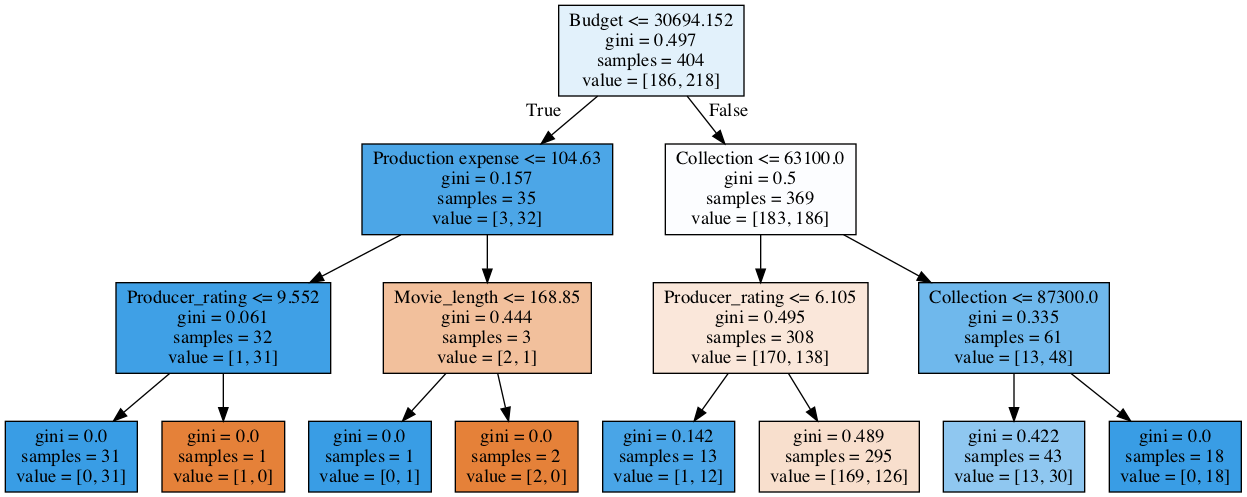

In [30]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Controlling Tree growth

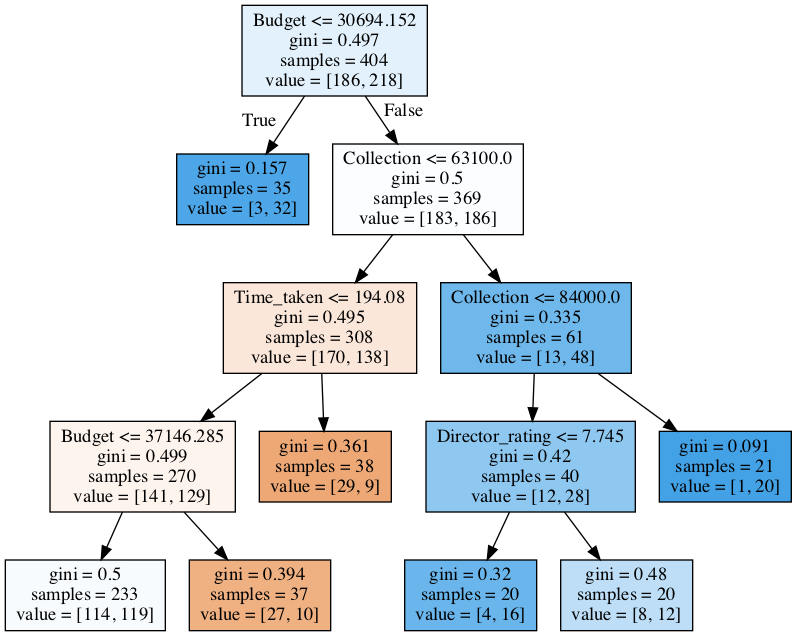

In [31]:
ctree2 = tree.DecisionTreeClassifier(min_samples_leaf = 20, max_depth=4)
ctree2.fit(X_train, y_train)
dot_data = tree.export_graphviz(ctree2, out_file=None,feature_names= X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [32]:
accuracy_score(y_test, ctree2.predict(X_test))

0.5588235294117647

### Bagging
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html


https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html#sklearn.ensemble.BaggingRegressor



In [33]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()

In [34]:
from sklearn.ensemble import BaggingClassifier

In [35]:
bag_clf = BaggingClassifier(
                            base_estimator=clftree,
                            n_estimators=1000,
                            bootstrap=True,
                            n_jobs=-1,
                            random_state=42,
                            verbose=1
)

In [36]:
bag_clf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    1.7s remaining:   11.6s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    1.8s finished


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [37]:
confusion_matrix(y_test, bag_clf.predict(X_test))

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.1s remaining:    0.6s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.4s finished


array([[28, 16],
       [22, 36]])

In [38]:
accuracy_score(y_test, bag_clf.predict(X_test))

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.1s remaining:    0.5s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.3s finished


0.6274509803921569

### Random Forest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor


https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(
                              n_estimators=1000,
                              n_jobs=-1,
                              verbose=1,
                              random_state=42
                            )

In [40]:
rf_clf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)

In [41]:
confusion_matrix(y_test, rf_clf.predict(X_test))

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 1000 out of 1000 | elapsed:    0.1s finished


array([[25, 19],
       [18, 40]])

In [42]:
accuracy_score(y_test, rf_clf.predict(X_test))

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 1000 out of 1000 | elapsed:    0.1s finished


0.6372549019607843

### Grid Search
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
rf_clf = RandomForestClassifier(n_estimators=250,random_state=42)

In [45]:
params_grid = {"max_features" : [4,5,6,7,8,9,10],
              "min_samples_split": [2, 3, 10],
              }

In [46]:
grid_search = GridSearchCV(
                            rf_clf, 
                            params_grid,
                            n_jobs=-1, 
                            cv=5, 
                            scoring='accuracy')

In [47]:
grid_search.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=250, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_f

In [48]:
grid_search.best_params_ 

{'max_features': 7, 'min_samples_split': 3}

In [49]:
cvrf_clf = grid_search.best_estimator_

In [50]:
accuracy_score(y_test, cvrf_clf.predict(X_test))

0.6372549019607843

In [51]:
confusion_matrix(y_test, cvrf_clf.predict(X_test))

array([[27, 17],
       [20, 38]])

### Gradient Boosting
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor


In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [54]:
accuracy_score(y_test, gbc_clf.predict(X_test))

0.5882352941176471

gbc_clf2 = GradientBoostingClassifier(
                                     learning_rate =0.02, 
                                     n_estimators =1000, 
                                     max_depth = 1
                                     )
gbc_clf2.fit(X_train, y_train)

In [60]:
accuracy_score(y_train, gbc_clf.predict(X_train))

0.9925742574257426

In [62]:
accuracy_score(y_test, gbc_clf.predict(X_test))

0.5882352941176471

### Ada Boost
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor



In [63]:
from sklearn.ensemble import AdaBoostClassifier

In [64]:
ada_clf = AdaBoostClassifier(
                            learning_rate =0.02, 
                            n_estimators =5000)

In [65]:
ada_clf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.02,
                   n_estimators=5000, random_state=None)

In [66]:
accuracy_score(y_test, ada_clf.predict(X_test))

0.6274509803921569

In [67]:
ada_clf2 = AdaBoostClassifier(
                             rf_clf,
                             learning_rate =0.05, 
                             n_estimators =500)

In [68]:
ada_clf2.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=250,
                        

In [69]:
accuracy_score(y_test, ada_clf2.predict(X_test))

0.6078431372549019

### XG Boost
http://xgboost.readthedocs.io/en/latest/

In [70]:
import xgboost as xgb

#### Prameter Tuning

1. General Parameters: Guide the overall functioning
2. Booster Parameters: Guide the individual booster (tree/regression) at each step
3. Learning Task Parameters: Guide the optimization performed

In [71]:
xgb_clf = xgb.XGBClassifier(
                            max_depth=5,
                            n_estimators=1000,
                            verbose=1,
                            random_state=42,
                            learning_rate=0.3,
                            n_jobs=-1
)

In [72]:
xgb_clf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbose=1, verbosity=None)

In [73]:
accuracy_score(y_test, xgb_clf.predict(X_test))

0.6764705882352942

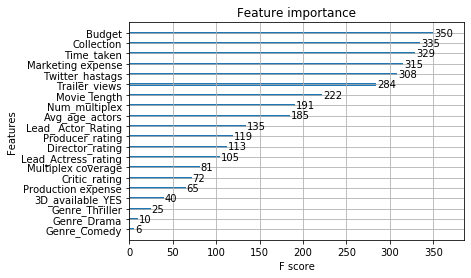

In [74]:
xgb.plot_importance(xgb_clf)

In [75]:
xgb_clf = xgb.XGBClassifier(
                            n_estimators=250,
                            learning_rate=0.1, 
                            random_state=42
                            )

In [76]:
param_test = {
    'max_depth':range(3,10,2),
    'gamma' : [0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha':[ 1e-2, 0.1, 1]
}

In [77]:
grid_search = GridSearchCV(
                           xgb_clf, 
                           param_test,
                           n_jobs=-1, 
                           cv=5, 
                           scoring='accuracy')

In [78]:
grid_search.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constrain...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid='warn', n_jobs=-1,
             param_

In [79]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.2,
 'max_depth': 9,
 'reg_alpha': 0.01,
 'subsample': 0.8}

In [80]:
cvxg_clf = grid_search.best_estimator_

In [81]:
accuracy_score(y_test, cvxg_clf.predict(X_test))

0.6470588235294118